In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

#enviorement: nosql3.8

api_key="cfb0e81f9edc5ff91586f4672ba286fb"

# base_url=f"https://api.openweathermap.org/data/2.5/weather?q=Madrid&units=metric&appid={api_key}"

# response=(requests.get(base_url, params={"api_key":api_key})).json()

base_url=f"https://api.openweathermap.org/data/2.5/weather?q=Sudafrica&units=metric"

response1=(requests.get(base_url, params={"appid":api_key})).json()

df=pd.json_normalize(response1)

df.head()

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.humidity,main.sea_level,main.grnd_level,wind.speed,wind.deg,wind.gust,clouds.all,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 802, 'main': 'Clouds', 'description': ...",stations,10000,1764238107,7200,953987,Republic of South Africa,200,26,-30,...,23,1012,854,7.04,342,6.5,41,ZA,1764212879,1764262779


City name

Temperature (°C)

Humidity (%)

Wind speed (m/s or km/h)

Weather description (e.g., “clear sky”)

In [2]:
requests=df[['name','main.temp', 'main.humidity','wind.speed', 'sys.sunrise']]
requests

,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,Republic of South Africa,29.5,23,7.04,1764212879


In [3]:
paises_por_continente = [
    "Egipto",
    "Nigeria",
    "Sudafrica",
    "Canadá",
    "Brasil",
    "México",
    "Argentina",
    "Japon",
    "India",
    "China",
    "Tailandia",
    "Francia",
    "Alemania",
    "España",
    "Colombia",
    "bielorrusia",
    "Francia",
    "Islandia",
    "Rusia",
    "Peru"
]

resultado=[]

for i in paises_por_continente:

    base_urli=f"https://api.openweathermap.org/data/2.5/weather?q={i}&units=metric"

    response=(requests.get(base_urli, params={"appid":api_key})).json()

    df_fila=pd.json_normalize(response)

    df_fila=df_fila[['name','main.temp', 'main.humidity','wind.speed', 'sys.sunrise']]

    resultado.append(df_fila)

df_final=pd.concat(resultado, ignore_index=True)
df_final



    

TypeError: NDFrame.get() got an unexpected keyword argument 'params'

In [ ]:
df_final.to_csv('PaisesTempetaura.csv')

NameError: name 'df_final' is not defined

In [7]:
df_final=pd.read_csv("/home/sebas/Weather-Data-Analysis-with-a-public-API/Api/PaisesTempetaura.csv")

In [8]:
df_final.head()

,Unnamed: 0,name,main.temp,main.humidity,wind.speed,sys.sunrise
0,0,Egypt,18.55,36,3.57,1764131306
1,1,Nigeria,34.14,16,4.20,1764134843
2,2,Republic of South Africa,28.38,17,3.03,1764126491
3,3,Canadá,32.11,43,1.93,1764144388
4,4,Brazil,31.06,59,1.25,1764148105


4. Data Analysis

Answer questions such as:
Which cities are the hottest and coldest right now?


In [9]:
max=df_final["name"][df_final["main.temp"] == df_final["main.temp"].max()] ## hay que hacer un .item() para coger solo para un elemento
min=df_final["name"][df_final["main.temp"] == df_final["main.temp"].min()]


In [10]:
print(f'El pais mas caliente que es: {max.item()} y el pais mas frio es: {min.item()}')

El pais mas caliente que es: Nigeria y el pais mas frio es: Russia


Is there a relationship between temperature and humidity?

In [11]:
df_final.columns

Index(['Unnamed: 0', 'name', 'main.temp', 'main.humidity', 'wind.speed',
       'sys.sunrise'],
      dtype='object')

In [12]:
## Acordarse si se usa f "" al usar los valores dentro se usa ' '
print(f"La relacion que hay que hay entre temperatura y humedad es {abs(df_final['main.temp'].corr(df_final['main.humidity']).round(4))}")

La relacion que hay que hay entre temperatura y humedad es 0.6582


Which continent seems to have the windiest cities?

In [13]:
paises_africa = [
    "Egipto",
    "Nigeria",
    "Sudafrica"
]

paises_america = [
    "Canadá",
    "México",
    "Colombia",
    "Peru",
    "Brasil",
    "Argentina"
]

paises_asia = [
    "Japon",
    "India",
    "China",
    "Tailandia"
]

paises_europa = [
    "Francia",
    "Alemania",
    "España",
    "Bielorrusia",
    "Islandia"
    ]

total=[paises_africa,paises_america,paises_asia,paises_europa]

resultadoTotal=[]
for paises in total:

    df1= df_final[df_final['name'].isin(paises)]
    max_aire=df1["name"][df1["wind.speed"] == df1["wind.speed"].max()]
    resultadoTotal.append(max_aire.item())

print(f'Los pases con más viento son: {resultadoTotal[0]}, {resultadoTotal[1]}, {resultadoTotal[2]} y {resultadoTotal[3]}')

Los pases con más viento son: Nigeria, Peru, China y Islandia


What’s the most common weather description (e.g., clear, cloudy, rainy)?

In [14]:
df_final=df_final.drop(columns="Unnamed: 0")


In [ ]:
df_final.columns

Index(['name', 'main.temp', 'main.humidity', 'wind.speed', 'sys.sunrise'], dtype='object')

In [ ]:
# final=df_final.groupby('sys.sunrise')['name']
final=df_final.groupby('name')['main.temp'].sum()
# final
print(final)

name
Argentina                   33.39
Belarus                      5.34
Brazil                      31.06
Canadá                      32.11
China                       23.18
Colombia                    27.27
Egypt                       18.55
España                      28.17
Francia                     57.96
Germany                      3.08
Innichen                    -3.00
Islandia                    13.15
Japan                       12.00
Mexico City                 10.96
Nigeria                     34.14
Peru                         2.92
Republic of South Africa    28.38
Russia                     -24.43
Thailand                    18.94
Name: main.temp, dtype: float64


In [25]:
rango = [-25,-15,0,10,20,30,40]
etiqueta= ["<-25", "-25/-10", "0-10", "10-20", "20-30", ">30"]

df_final['rango.temperatura'] = pd.cut(
    df_final['main.temp'],
    bins=rango,
    labels=etiqueta,
    right=False
)

df_final['rango.temperatura'].value_counts()

rango.temperatura
20-30      6
10-20      5
>30        4
0-10       3
-25/-10    1
<-25       1
Name: count, dtype: int64

In [24]:
print(f'La el rango de temperatura mas comun es: {df_final['rango.temperatura'].value_counts().index[0]}')

La el rango de temperatura mas comun es: 20-30


Example 1: Bar chart of average temperature by continent.

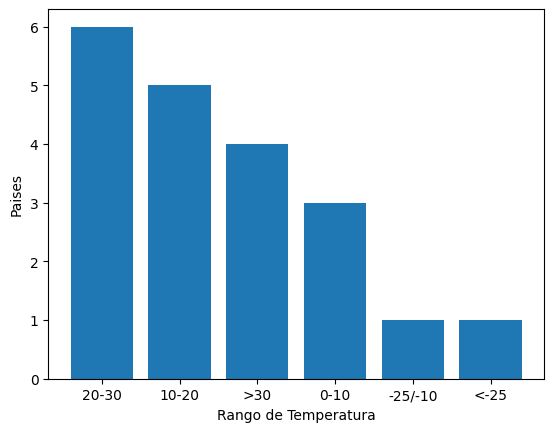

In [37]:
varianza = df_final["rango.temperatura"].value_counts()
plt.bar(varianza.index, varianza.values)
plt.xlabel("Rango de Temperatura")
plt.ylabel("Paises")
plt.show()

Example 2: Scatter plot of temperature vs humidity.